In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fitness_range = np.linspace(-0.15, 0.05, 1000)

In [26]:
coverage_average = 100

No. of generations with selection on kanamycin

In [27]:
t_kan = 20

No. of generations in recovery from freezer stock

In [28]:
t_rec = 6

No. of generations in fitness assay

In [29]:
t_fa = 6.5

In [30]:
coverage_site_0 = coverage_average*(1+fitness_range)**(t_kan+t_rec)

Text(0, 0.5, 'Coverage for mutant')

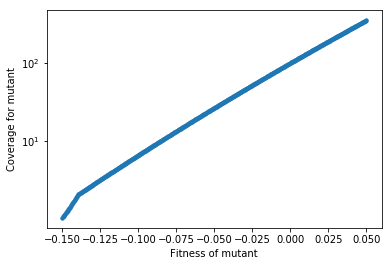

In [31]:
plt.plot(fitness_range, coverage_site_0, '.')
plt.yscale('symlog')
plt.xlabel('Fitness of mutant')
plt.ylabel('Coverage for mutant')

In [32]:
coverage_site_1 = coverage_site_0*(1+fitness_range)**t_fa

In [33]:
np.min(coverage_site_1)

0.5082941199381232

Now, to estimate bounds in fitness estimates for different values of true fitness

In [34]:
upper = np.log((coverage_site_1 + coverage_site_1**0.5)/((coverage_site_0 - coverage_site_0**0.5)))/t_fa
lower = np.log((coverage_site_1 - coverage_site_1**0.5)/((coverage_site_0 + coverage_site_0**0.5)))/t_fa

/Users/anuraglimdi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


(-0.4, 0.2)

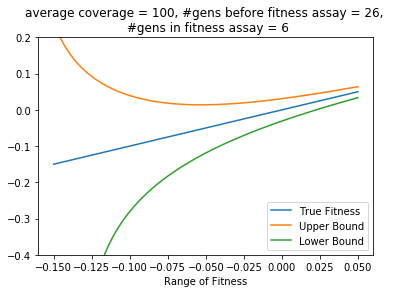

In [35]:
plt.plot(fitness_range, fitness_range,label='True Fitness')
plt.plot(fitness_range, upper,label='Upper Bound')
plt.plot(fitness_range, lower,label="Lower Bound")
plt.xlabel('Range of Fitness')
plt.legend(loc=0)
plt.title('average coverage = %i, #gens before fitness assay = %i, \n #gens in fitness assay = %i' % (coverage_average, t_kan+t_rec ,t_fa))
plt.ylim(-0.4,0.2)
#plt.savefig("/Users/anuraglimdi/Desktop/TnSeq_LTEE/figures_for_DAC/fitness_range_100_26_6", dpi=600)


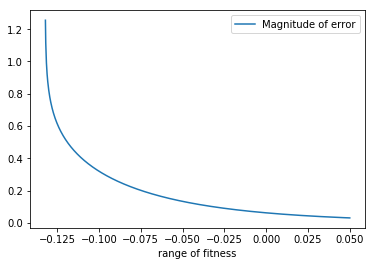

In [36]:
plt.plot(fitness_range, upper-lower,label="Magnitude of error")
plt.xlabel('range of fitness')
plt.legend(loc=0)

In [323]:
fitness_range[250]

-0.09994994994994993

In [324]:
lower[250]

-0.13859617175480488

In [325]:
upper[250]

-0.07319559341288978

In [265]:
fitness_range[500]

5.005005005005031e-05

In [266]:
lower[500]

-0.030799372633913278

In [267]:
upper[500]

0.030899975025505212